In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import SRMSE

In [2]:
# Load in the persons PUMS dataset for WA state
p_df = pd.read_csv("data/PUMS_2017_5YR_WA/psam_p53.csv")
h_df = pd.read_csv("data/PUMS_2017_5YR_WA/psam_h53.csv")

# Filter to desired variables (numeric then categorical)
pums_data_h = h_df[['SERIALNO','HINCP','NP','VEH','BLD','ACCESS']]
pums_data_p = p_df[['SERIALNO','PINCP','AGEP','JWMNP','SEX','SCHL','MAR','COW','DPHY','DEYE','DREM','RAC1P']]
del h_df
del p_df
pums_data = pd.merge(pums_data_p, pums_data_h, on='SERIALNO')
pums_data = pums_data.drop(labels=['SERIALNO'], axis=1)

# Convert numerical variables to categorical bins
pums_data['HINCP'], hincp_bins = pd.qcut(pums_data['HINCP'], q=10, labels=False, retbins=True)
pums_data['AGEP'], agep_bins = pd.qcut(pums_data['AGEP'], q=10, labels=False, retbins=True)
pums_data['JWMNP'], jwmnp_bins = pd.qcut(pums_data['JWMNP'], q=10, labels=False, retbins=True)
pums_data['PINCP'], pincp_bins = pd.qcut(pums_data['PINCP'], q=10, labels=False, retbins=True)

# Remove NA values and check n before/after
print(f"Dataset n={len(pums_data)} pre-cleaning")
pums_data = pums_data.dropna()
print(f"Dataset n={len(pums_data)} post-cleaning")
pums_data

Dataset n=359075 pre-cleaning
Dataset n=150203 post-cleaning


,PINCP,AGEP,JWMNP,SEX,SCHL,MAR,COW,DPHY,DEYE,DREM,RAC1P,HINCP,NP,VEH,BLD,ACCESS
4,9.0,6,9.0,1,21.0,1,1.0,2.0,2,2.0,1,9.0,3,3.0,2.0,1.0
5,7.0,6,4.0,2,21.0,1,3.0,2.0,2,2.0,1,9.0,3,3.0,2.0,1.0
7,5.0,7,6.0,1,19.0,1,3.0,2.0,2,2.0,1,3.0,2,3.0,1.0,3.0
8,4.0,6,2.0,2,16.0,1,1.0,2.0,2,2.0,1,3.0,2,3.0,1.0,3.0
9,2.0,4,0.0,1,5.0,5,1.0,2.0,2,2.0,9,1.0,5,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356007,7.0,4,8.0,1,21.0,1,1.0,2.0,2,2.0,6,3.0,3,2.0,2.0,1.0
356010,8.0,3,9.0,1,18.0,1,1.0,2.0,2,2.0,1,6.0,4,2.0,3.0,1.0
356013,7.0,5,9.0,1,18.0,1,1.0,2.0,2,2.0,1,6.0,3,4.0,2.0,1.0
356014,7.0,5,6.0,2,19.0,1,1.0,2.0,2,2.0,1,6.0,3,4.0,2.0,1.0


In [3]:
popsim_data_p = pd.read_csv('./populationsim-master/example_wa_16/output/synthetic_persons.csv')[['household_id','PINCP','AGEP','JWMNP','SEX','SCHL','MAR','COW','DPHY','DEYE','DREM','RAC1P']].dropna()
popsim_data_h = pd.read_csv('./populationsim-master/example_wa_16/output/synthetic_households.csv')[['household_id','HINCP','NP','VEH','BLD','ACCESS']].dropna()
popsim_data = pd.merge(popsim_data_p,popsim_data_h, on='household_id')
popsim_data = popsim_data.drop(labels='household_id', axis=1)

# Convert numerical variables to categorical bins
popsim_data['HINCP'] = pd.cut(popsim_data['HINCP'], bins=hincp_bins, labels=False)
popsim_data['AGEP'] = pd.cut(popsim_data['AGEP'], bins=agep_bins, labels=False)
popsim_data['JWMNP'] = pd.cut(popsim_data['JWMNP'], bins=jwmnp_bins, labels=False)
popsim_data['PINCP'] = pd.cut(popsim_data['PINCP'], bins=pincp_bins, labels=False)

# Remove NA values and check n before/after
print(f"Dataset n={len(popsim_data)} pre-cleaning")
popsim_data = popsim_data.dropna()
print(f"Dataset n={len(popsim_data)} post-cleaning")
popsim_data

Dataset n=3257534 pre-cleaning
Dataset n=3228874 post-cleaning


,PINCP,AGEP,JWMNP,SEX,SCHL,MAR,COW,DPHY,DEYE,DREM,RAC1P,HINCP,NP,VEH,BLD,ACCESS
0,9,5,1.0,1,16.0,1,1.0,2.0,2,2.0,1,9,5,3.0,2.0,1.0
1,9,9,0.0,1,22.0,1,7.0,2.0,2,2.0,1,9,3,3.0,2.0,1.0
2,9,9,0.0,1,22.0,1,7.0,2.0,2,2.0,1,9,3,3.0,2.0,1.0
3,9,9,0.0,1,22.0,1,7.0,2.0,2,2.0,1,9,3,3.0,2.0,1.0
4,9,9,0.0,1,22.0,1,7.0,2.0,2,2.0,1,9,3,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257529,2,3,9.0,2,21.0,5,3.0,2.0,2,2.0,1,0,1,0.0,9.0,1.0
3257530,2,3,9.0,2,21.0,5,3.0,2.0,2,2.0,1,0,1,0.0,9.0,1.0
3257531,2,3,9.0,2,21.0,5,3.0,2.0,2,2.0,1,0,1,0.0,9.0,1.0
3257532,2,3,9.0,2,21.0,5,3.0,2.0,2,2.0,1,0,1,0.0,9.0,1.0


In [4]:
vae_data = pd.read_csv('./data/synthetic_populations/wa_persons_100000.csv')[['PINCP','AGEP','JWMNP','SEX','SCHL','MAR','COW','DPHY','DEYE','DREM','RAC1P','HINCP','NP','VEH','BLD','ACCESS']].dropna()
vae_data

,PINCP,AGEP,JWMNP,SEX,SCHL,MAR,COW,DPHY,DEYE,DREM,RAC1P,HINCP,NP,VEH,BLD,ACCESS
0,5.0,5,1.0,1,13.0,5,7.0,2.0,2,2.0,1,1.0,3,2.0,2.0,1.0
1,5.0,2,1.0,2,18.0,1,1.0,2.0,2,2.0,1,1.0,3,2.0,2.0,1.0
2,6.0,6,9.0,1,15.0,1,1.0,2.0,2,2.0,1,1.0,3,2.0,2.0,1.0
3,5.0,3,5.0,1,20.0,1,1.0,2.0,2,2.0,1,4.0,2,1.0,7.0,3.0
4,6.0,6,0.0,1,19.0,1,1.0,2.0,2,2.0,1,4.0,2,1.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245697,5.0,3,0.0,2,20.0,5,1.0,2.0,2,2.0,1,1.0,5,2.0,2.0,1.0
245698,3.0,6,2.0,1,17.0,1,1.0,2.0,2,2.0,1,1.0,5,2.0,2.0,1.0
245699,4.0,5,4.0,1,22.0,1,6.0,2.0,2,2.0,1,1.0,5,2.0,2.0,1.0
245700,4.0,5,8.0,1,17.0,1,1.0,2.0,2,2.0,1,1.0,5,2.0,2.0,1.0


In [5]:
# Time Tests
num_variables = [4,8,16]
time_vae_train_hh = [51,57,63]
time_vae_gen_hh = [52,48,54]
time_vae_train_p = [134,95,120]
time_vae_gen_p = [129,210,449]
time_vae = []
for i in range(len(num_variables)):
    z = time_vae_train_hh[i]+time_vae_gen_hh[i]+time_vae_train_p[i]+time_vae_gen_p[i]
    time_vae.append(z)
time_pop = [245,588,924]
time_vae

[366, 410, 686]

In [6]:
# # SRMSE for the recreated popsim data
# print("POPSIM")
# SRMSE.calculateSRMSE(popsim_data, pums_data.sample(len(popsim_data), replace=True))
# SRMSE.calculateBivariateSRMSE(popsim_data, pums_data.sample(len(popsim_data), replace=True))

In [7]:
# # Theoretical minimum SRMSE pums on pums
# print("PUMS")
# SRMSE.calculateSRMSE(pums_data.sample(len(pums_data), replace=True), pums_data)
# SRMSE.calculateBivariateSRMSE(pums_data.sample(len(pums_data), replace=True), pums_data)

In [8]:
# # SRMSE for the recreated cvae data
# print("CVAE")
# SRMSE.calculateSRMSE(vae_data, pums_data.sample(len(vae_data), replace=True))
# SRMSE.calculateBivariateSRMSE(vae_data, pums_data.sample(len(vae_data), replace=True))

In [9]:
# Data Tests for VAE
num_samples = [100000,10000,1000,100,10,1]
srmse_uni_vae = [.0379,.0341,.0442,.0555,.1289,.2314]
srmse_bi_vae = [.0061,.0058,.0091,.0111,.0200,.0351]

# Only done with ~100000 samples; using fewer results in errors during convergence
srmse_uni_pop = [.0711]
srmse_bi_pop = [.0088]

srmse_uni_pums = [.0007]
srmse_bi_pums = [.0002]

In [10]:
all_pops = []
for num in num_samples:
    pop = pd.read_csv(f"./data/synthetic_populations/wa_persons_{num}.csv")
    pop['num_samples'] = num
    all_pops.append(pop)
all_pops = pd.concat(all_pops)

/home/zack/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


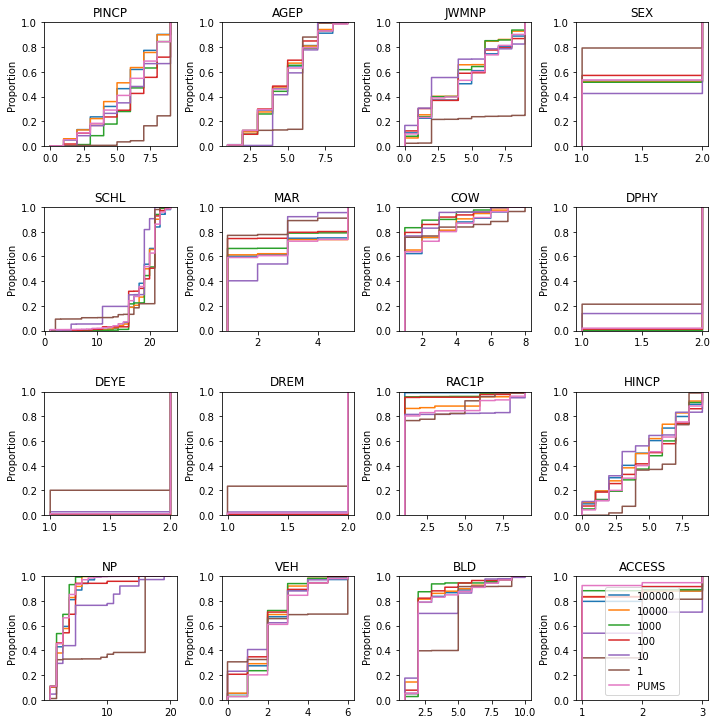

In [11]:
# Generate Distributions of All HH variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
fig.tight_layout(h_pad=4)

# Plot distribution of each variable for each number of population sample size
for popsize in num_samples:
    data_subset = all_pops[all_pops['num_samples']==popsize]
    for i, var in enumerate(data_subset.columns[:-1]):
        sns.ecdfplot(data=data_subset, x=var, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(var)
        axes.flatten()[i].set_xlabel(None)

# Plot the PUMS data distribution on top
for i, var in enumerate(data_subset.columns[:-1]):
    sns.ecdfplot(data=pums_data, x=var, ax=axes.flatten()[i])
    axes.flatten()[i].set_title(var)
    axes.flatten()[i].set_xlabel(None)

# Add legend with label for PUMS
plt.legend(labels=num_samples+['PUMS'])

In [ ]:
# Generate Distributions of All HH variables
fig, axes = plt.subplots(nrows=len(vae_data.columns), ncols=1, figsize=(5,10))
fig.tight_layout(h_pad=4)

for i, var in enumerate(vae_data.columns):
    sns.ecdfplot(data=pums_data, x=var, ax=axes[i]).set(xlim=(min(pums_data[var]),max(pums_data[var])))
    sns.ecdfplot(data=popsim_data, x=var, ax=axes[i]).set(xlim=(min(pums_data[var]),max(pums_data[var])))
    sns.ecdfplot(data=vae_data, x=var, ax=axes[i]).set(xlim=(min(pums_data[var]),max(pums_data[var])))
    axes[i].set_title(var)
    axes[i].set_xlabel(None)
    plt.legend(labels=['PUMS','PopSim','CVAE'])

<ipython-input-12-e513c3ad0b6e>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(h_pad=4)
